<a href="https://colab.research.google.com/github/NancyAmer0/ZomatoRegression/blob/main/Zomato_Reg_Trial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd

import gdown

from google.colab import files

url = f"https://drive.google.com/uc?id=1-B3C1F1fzYb-tqseby07pGu-AoDo0Yj4&export=download"
output = "zomato.csv"

# Download the filev
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-B3C1F1fzYb-tqseby07pGu-AoDo0Yj4&export=download
From (redirected): https://drive.google.com/uc?id=1-B3C1F1fzYb-tqseby07pGu-AoDo0Yj4&export=download&confirm=t&uuid=53f446e1-ccd4-4e2c-8eab-23cb414ff231
To: /content/zomato.csv
100%|██████████| 574M/574M [00:11<00:00, 49.3MB/s]


'zomato.csv'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import math
import re

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#Read the Data

In [ ]:
df = pd.read_csv('zomato.csv')

#EDA

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
df.describe(include='O')

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [ ]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [ ]:
(df.isnull().sum()/len(df))*100

,0
url,0.000000
address,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
phone,2.335789
location,0.040606
rest_type,0.438927


In [ ]:
df.duplicated().sum()

0

#UVA

##Online Order

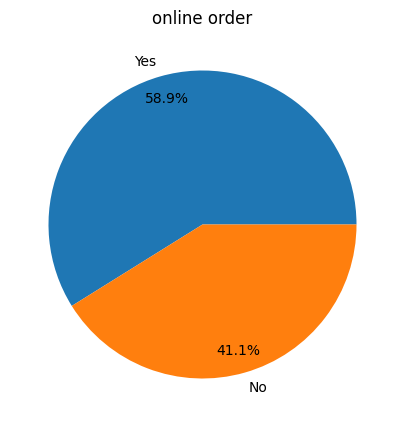

In [ ]:
online_order = df['online_order'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(online_order, labels=online_order.index, autopct='%1.1f%%', pctdistance=0.85)
plt.title("online order")

# Show the plot
plt.show()

##Book Table

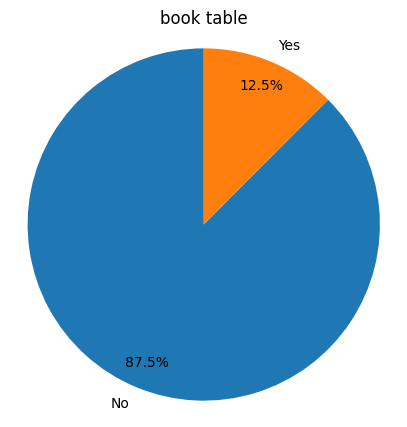

In [ ]:
book_table = df['book_table'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(book_table, labels=book_table.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title("book table")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show the plot
plt.show()

##listed_in(type)

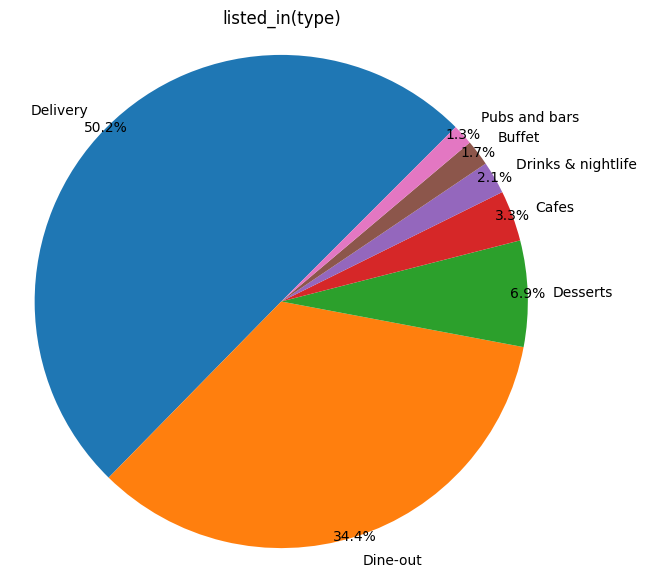

In [ ]:
listed_in_type = df['listed_in(type)'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(listed_in_type, labels=listed_in_type.index, autopct='%1.1f%%', startangle=45, pctdistance=1)
plt.title("listed_in(type)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show the plot
plt.show()

In [ ]:
df['cuisines'].value_counts()

,count
cuisines,
North Indian,2913
"North Indian, Chinese",2385
South Indian,1828
Biryani,918
"Bakery, Desserts",911
...,...
"North Indian, Chinese, South Indian, Juices",1
"North Indian, Chinese, Kebab, Mughlai",1
"Chinese, Vietnamese, Thai, Malaysian",1


In [ ]:
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19132
Casual Dining,10330
Cafe,3732
Delivery,2604
Dessert Parlor,2263
...,...
"Dessert Parlor, Kiosk",2
"Food Court, Beverage Shop",2
"Dessert Parlor, Food Court",2


<Axes: xlabel='count', ylabel='listed_in(city)'>

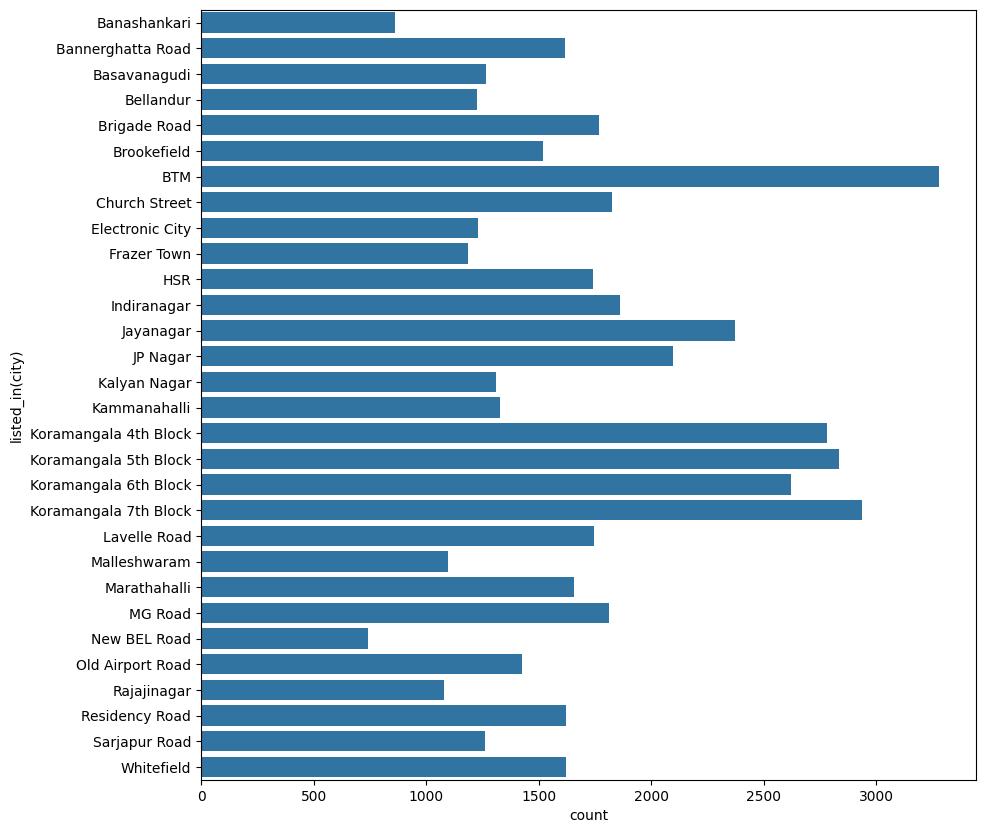

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(df['listed_in(city)'])

##first edits

###cuisines

In [ ]:
df['cuisines'].nunique()

2723

In [ ]:
#checking if there are any repeated cuisines in different orders
df['cuisines'] = df['cuisines'].apply(
    lambda x: ', '.join(sorted([item.strip().lower() for item in x.split(',')])) if isinstance(x, str) else x)

In [ ]:
df['cuisines'].nunique()

1920

unique values were dramatically reduced after sorting the words.

###restaurant type

In [ ]:
df['rest_type'].nunique()

93

In [ ]:
#applying the same check on the restaurant type
df['rest_type'] = df['rest_type'].apply(lambda x:', '.join(sorted([item.strip().lower() for item in x.split(',')])) if isinstance(x, str) else x)

In [ ]:
df['rest_type'].nunique()

69

###Dishes liked

In [ ]:
df['dish_liked'].nunique()

5271

In [ ]:
#sorting the dishes liked and getting red of any duplicates
df['dish_liked'] = df['dish_liked'].apply(lambda x: ', '.join(sorted([item.strip() for item in x.split(',')])) if isinstance(x,str) else x)

In [ ]:
df['dish_liked'].nunique()

4896

In [ ]:
df['location'].nunique()

93

In [ ]:
df['location'] = df['location'].apply(lambda x: ', '.join(sorted([item.strip() for item in x.split(',')])) if isinstance(x,str) else x)

In [ ]:
df['location'].nunique()

93

In [ ]:
#no changes made to the location

###cost

In [ ]:
#simplify the column name
df.rename(columns={'approx_cost(for two people)':'cost'}, inplace=True)

In [ ]:
#cahnging the data type
df['cost'] = pd.to_numeric(df['cost'].str.replace(',', ''), errors='coerce')

###rates

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rate'] = df['rate'].replace({'-': np.nan})

In [ ]:
df['rate'] = df['rate'].apply(lambda x: float(str(x).split('/')[0].strip()) if isinstance(x, str) and '/' in x else x)
df['rate'] = df['rate'].apply(lambda x: x if x == 'NEW' else pd.to_numeric(x, errors='coerce'))

In [ ]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4.0, 4.2, 3.9, 3.1, 3.0, 3.2, 3.3, 2.8,
       4.4, 4.3, 'NEW', 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2.0, 1.8], dtype=object)

In [ ]:
df['new_res'] = df['rate'].apply(lambda x: 1 if x == 'NEW' else 0)
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

<ipython-input-482-08d3c2390a68>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rate'] = df['rate'].replace('NEW', np.nan)


In [ ]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

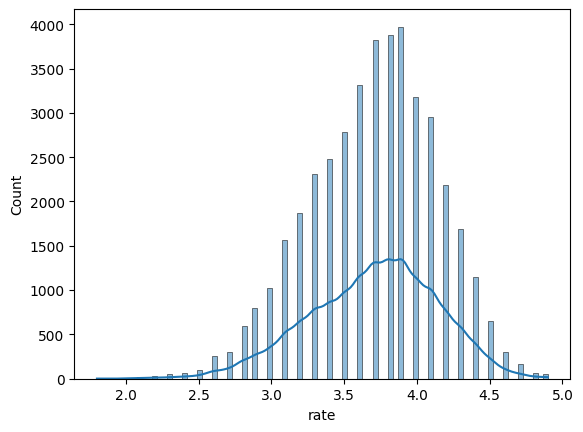

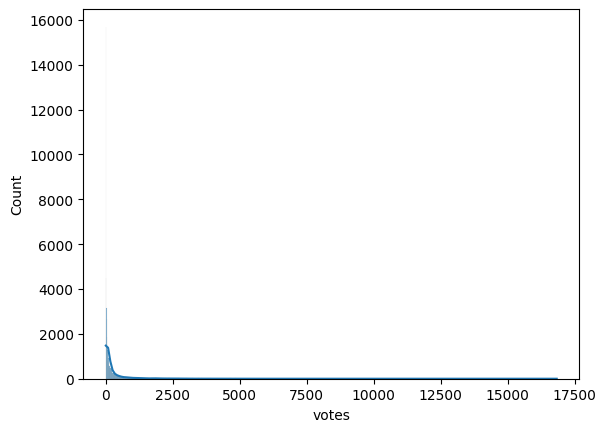

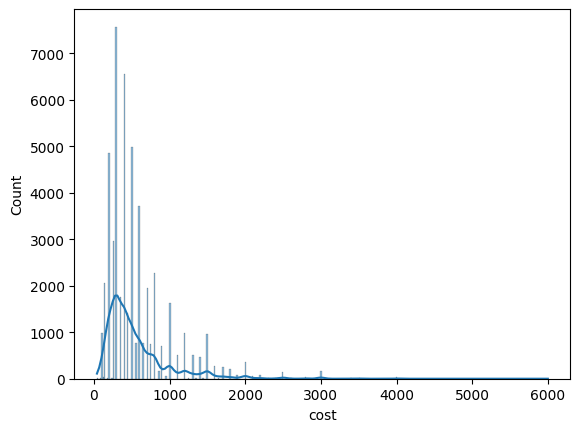

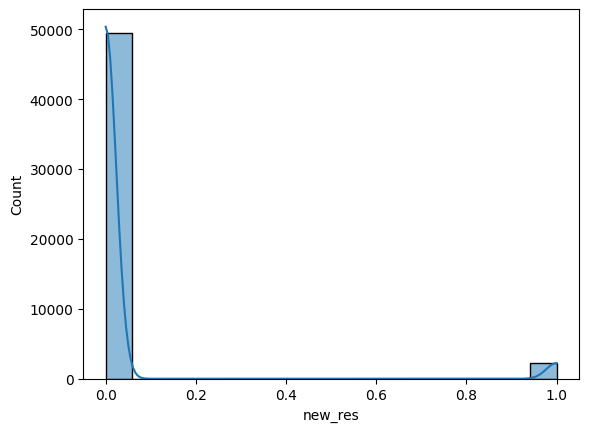

In [ ]:
#Histogram for all numerical values
for i in df.iloc[:,:].columns:
  if df[i].dtype in ['int64', 'float64']:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

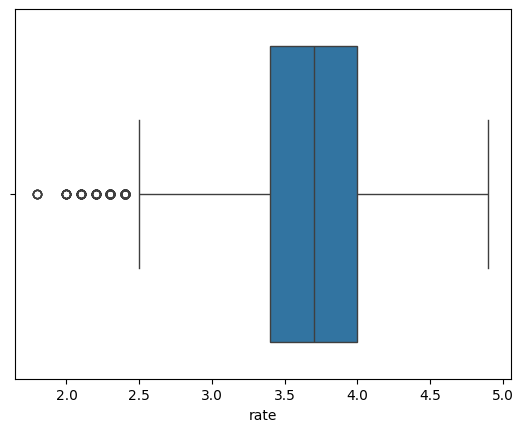

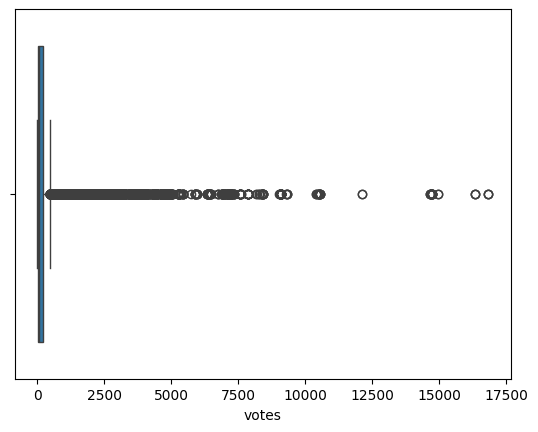

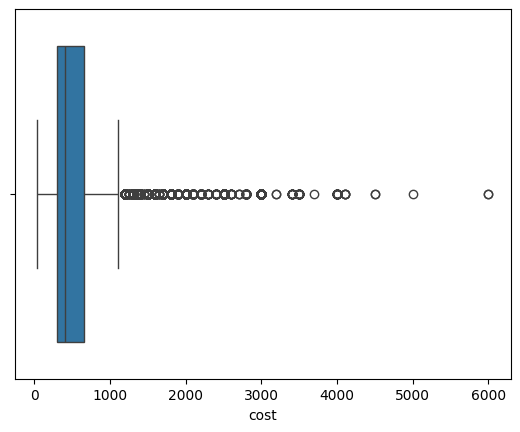

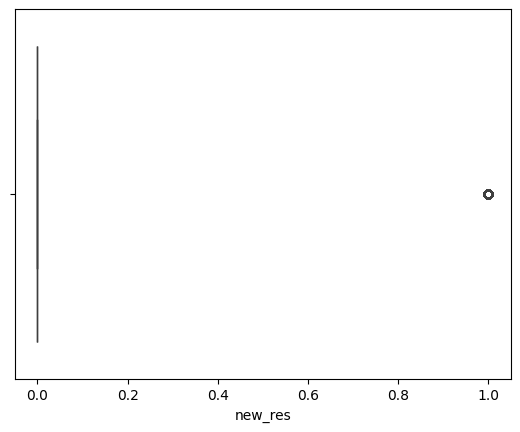

In [ ]:
#Box plots for all numerical values
for i in df.iloc[:,:].columns:
  if df[i].dtype in ['int64', 'float64']:
    sns.boxplot(data=df,x=i)
    plt.show()

###reviews list

In [ ]:
print(df['reviews_list'].unique())

['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this pla

###Listed-in type

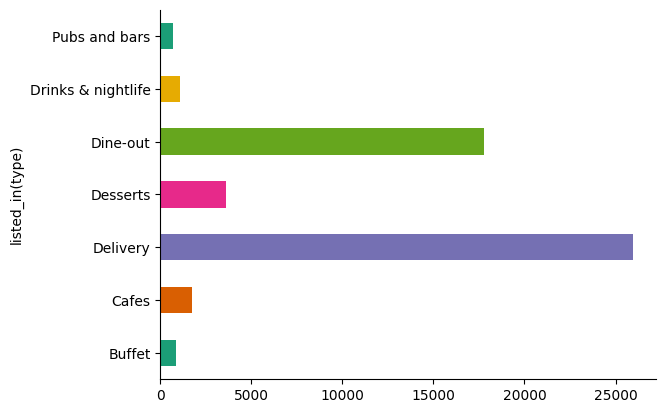

In [ ]:
df.groupby('listed_in(type)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#BVA

##online order & book table

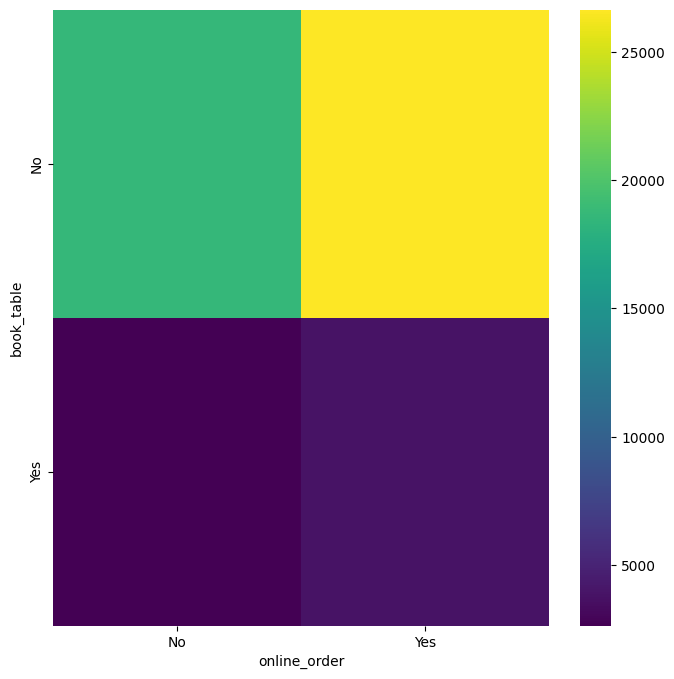

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['book_table'].value_counts()
    for x_label, grp in df.groupby('online_order')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('online_order')
_ = plt.ylabel('book_table')

##Cost & Listed-in City

In [ ]:
#Cities ranges of cost

<ipython-input-490-e0be6d3c9f97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='listed_in(city)', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=sorted_cities_by_cost)
<ipython-input-490-e0be6d3c9f97>:3: UserWarning: 
The palette list has fewer values (6) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, x='listed_in(city)', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=sorted_cities_by_cost)


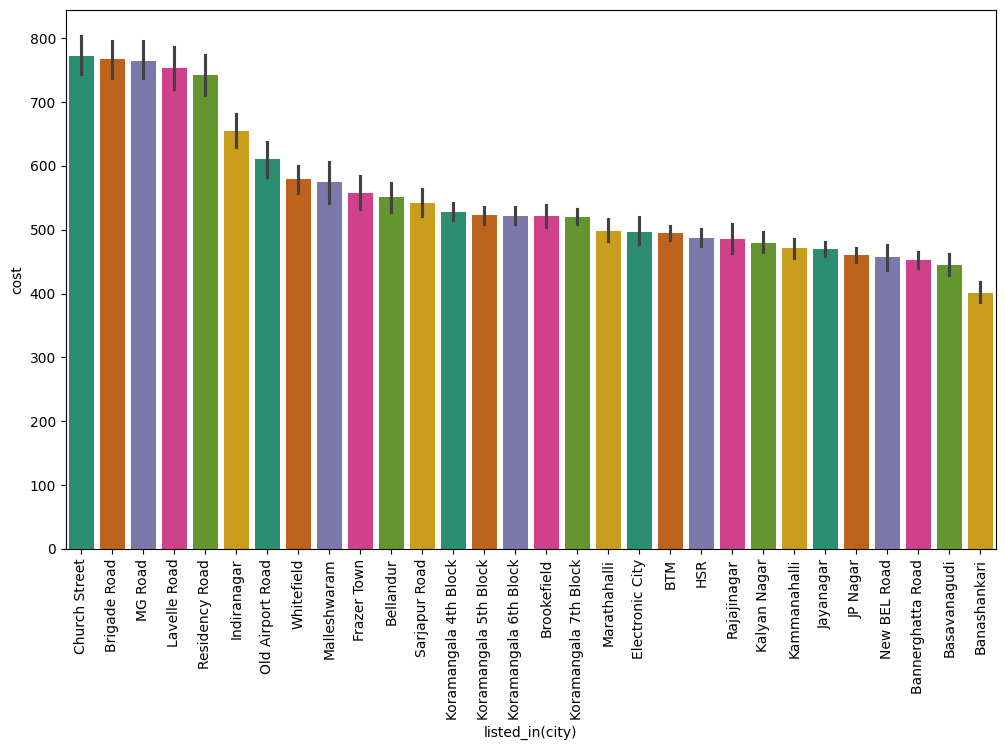

In [ ]:
plt.figure(figsize=(12,7))
sorted_cities_by_cost = df.groupby('listed_in(city)')['cost'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='listed_in(city)', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=sorted_cities_by_cost)
plt.xticks(rotation=90)
plt.show()

##Cost & location

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


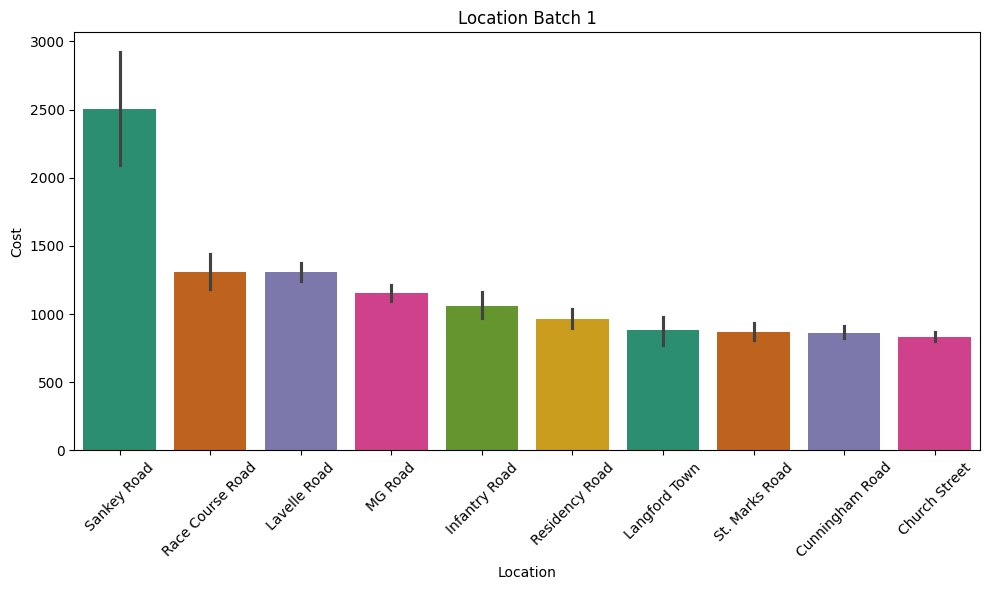

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


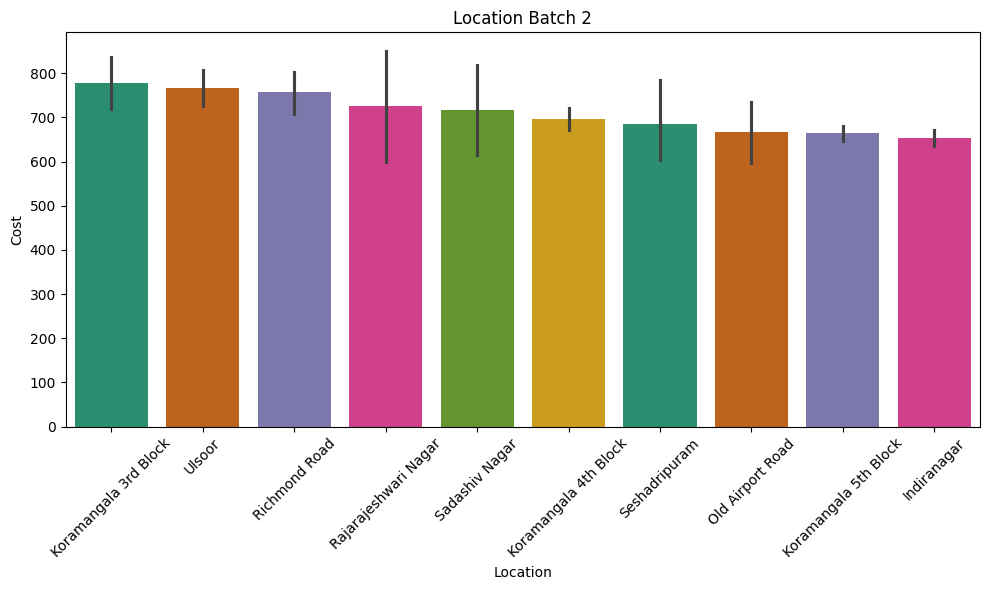

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


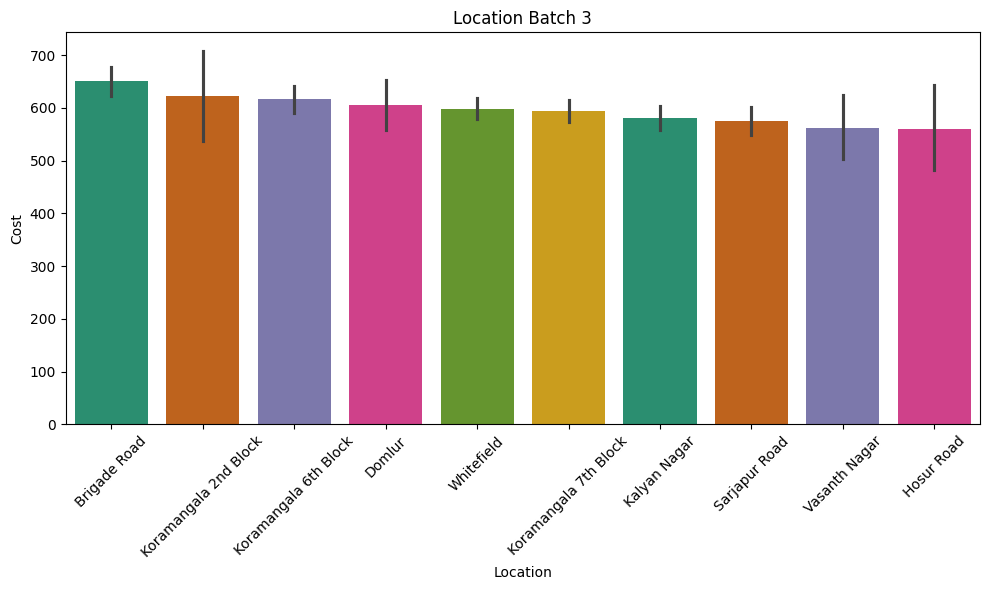

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


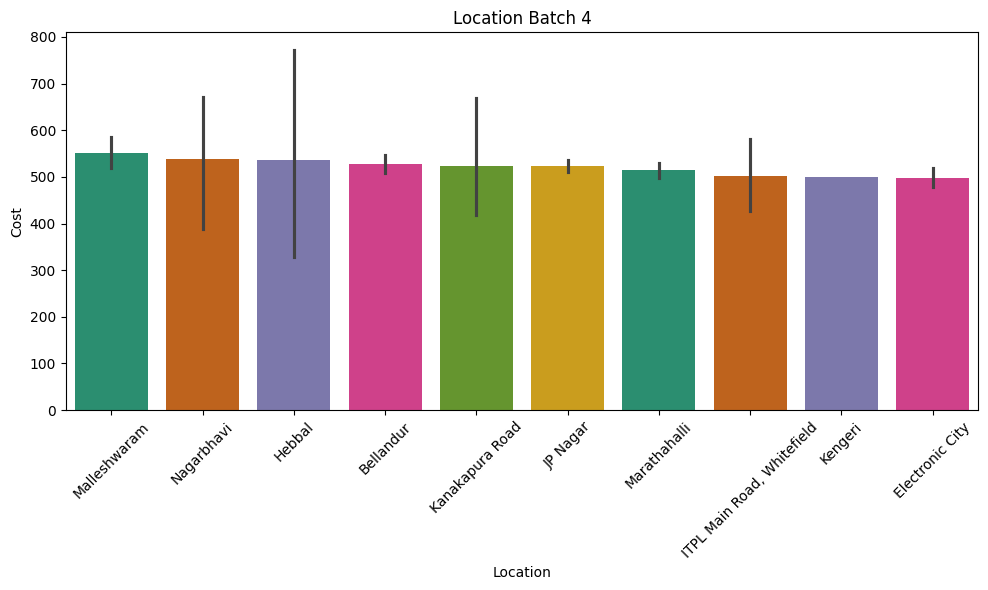

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


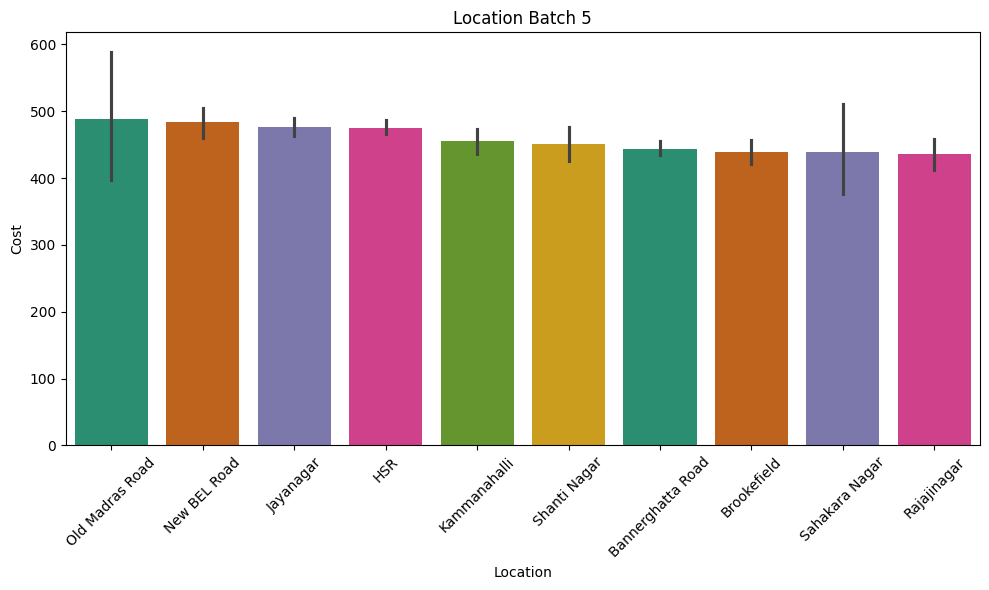

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


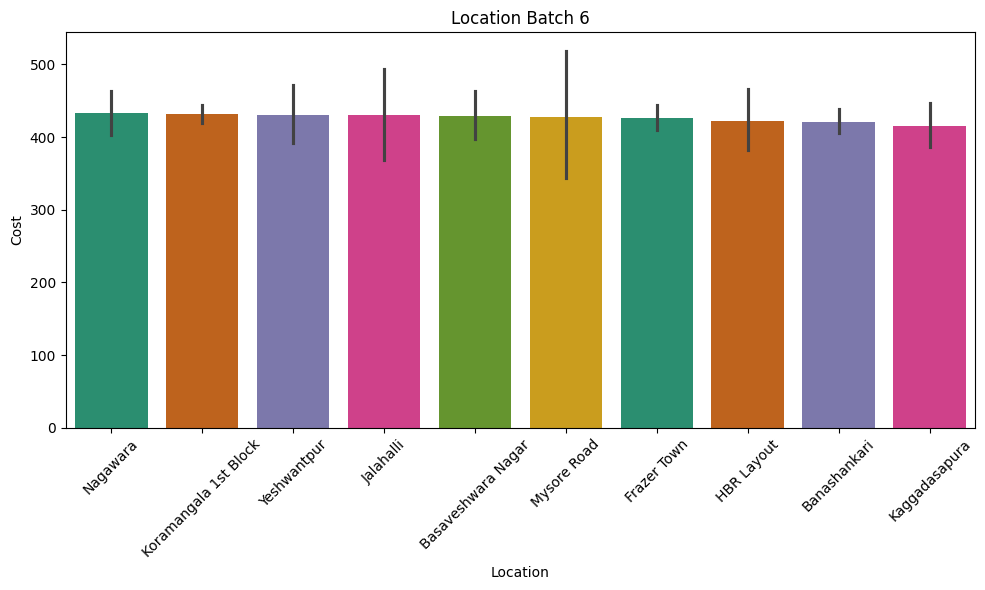

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


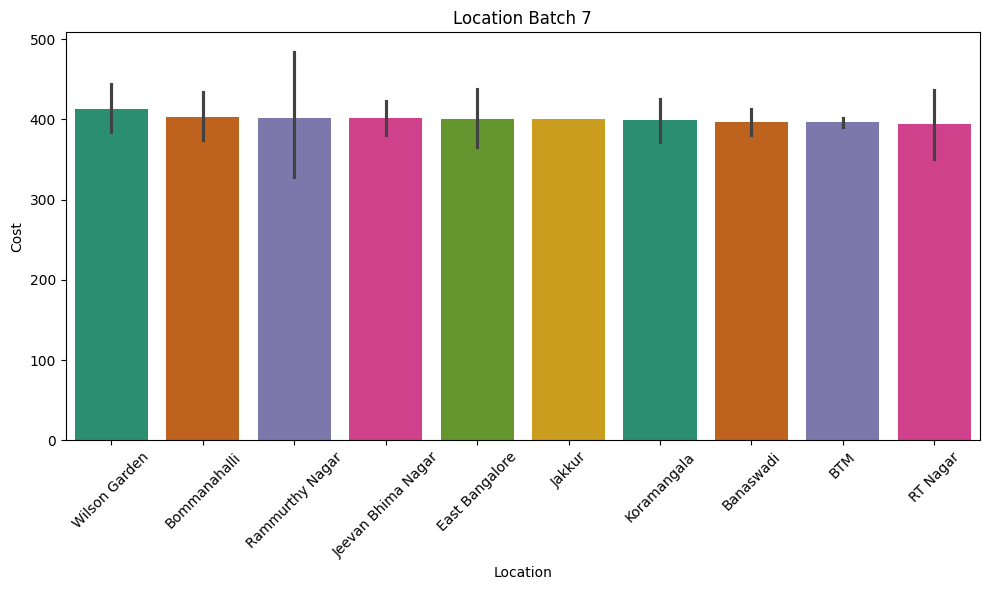

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


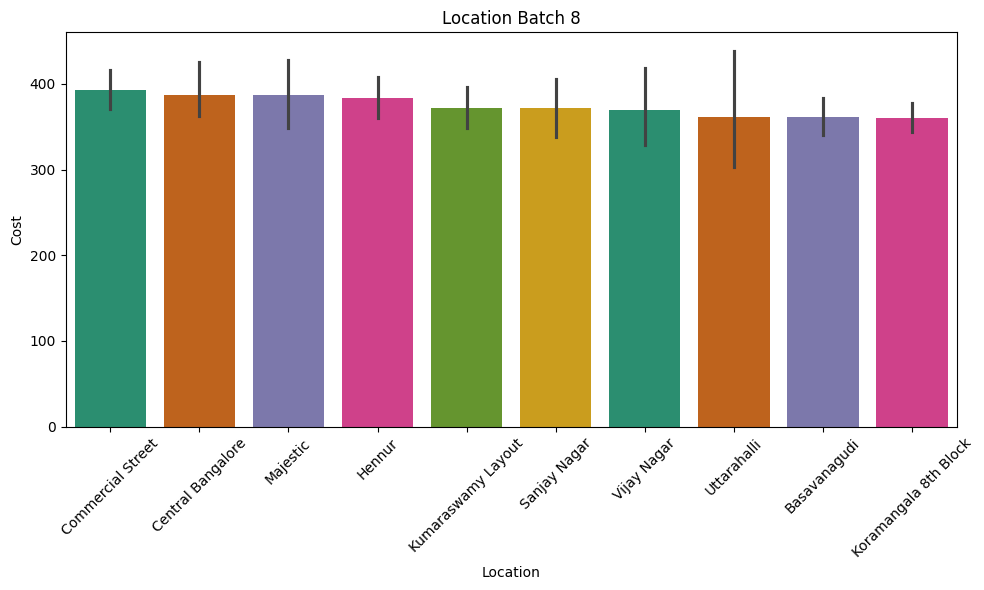

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


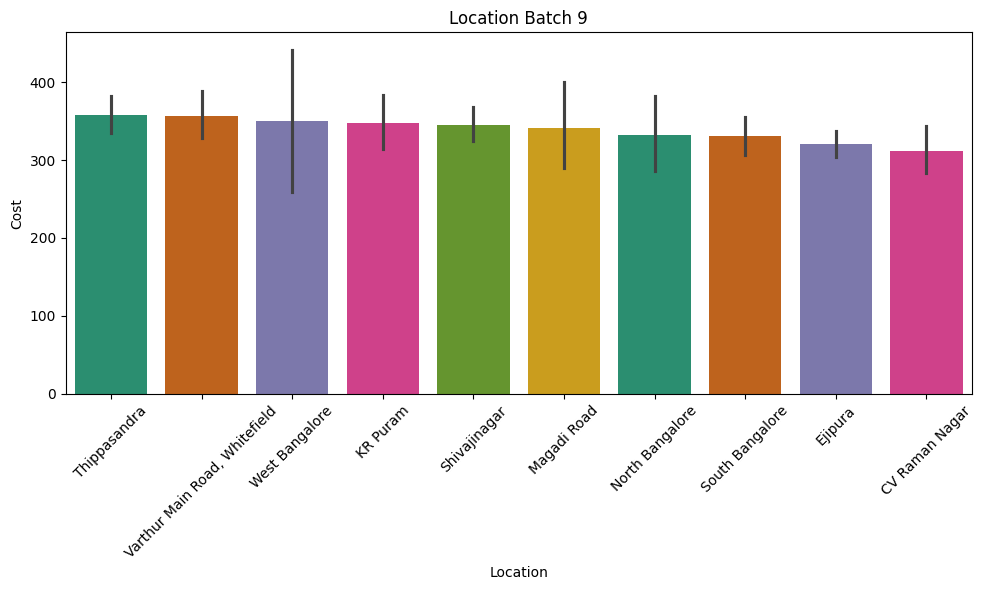

<ipython-input-491-09c443828a93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)
<ipython-input-491-09c443828a93>:12: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)


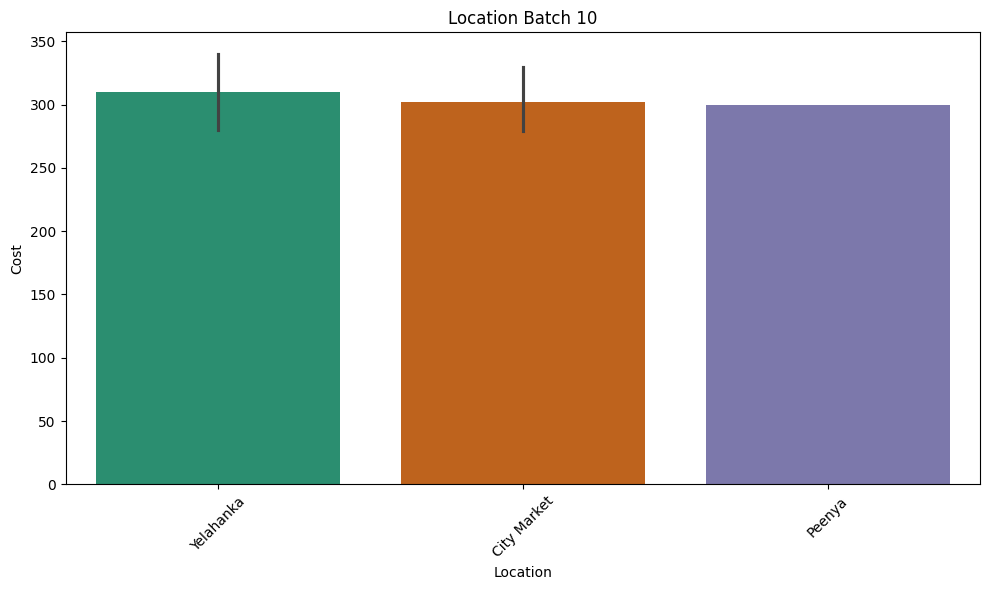

In [ ]:
sorted_locations_by_cost = (df.groupby('location')['cost'].mean().sort_values(ascending=False))


# Create batches of 10 cities
location_batches = [sorted_locations_by_cost.index[i:i + 10] for i in range(0, len(sorted_locations_by_cost), 10)]

# Loop through each batch and plot
for i, batch in enumerate(location_batches):
  batch_df = df[df['location'].isin(batch)]
  batch_df = batch_df.groupby('location')['cost'].mean().loc[batch].reset_index()
  plt.figure(figsize=(10, 6))  # Create a new figure for each batch
  sns.barplot(data=df[df['location'].isin(batch)],  x='location', y='cost', palette=sns.palettes.mpl_palette('Dark2'), order=batch)

  plt.title(f"Location Batch {i + 1}")  # Title for each batch
  plt.xticks(rotation=45)
  plt.ylabel('Cost')
  plt.xlabel('Location')
  plt.tight_layout()  # Adjust layout for better fit
  plt.show()

##Cost and Listed-in Type

<ipython-input-492-c71e5c3d366e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='listed_in(type)', y='cost', palette=sns.palettes.mpl_palette('Dark2'))
<ipython-input-492-c71e5c3d366e>:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, x='listed_in(type)', y='cost', palette=sns.palettes.mpl_palette('Dark2'))


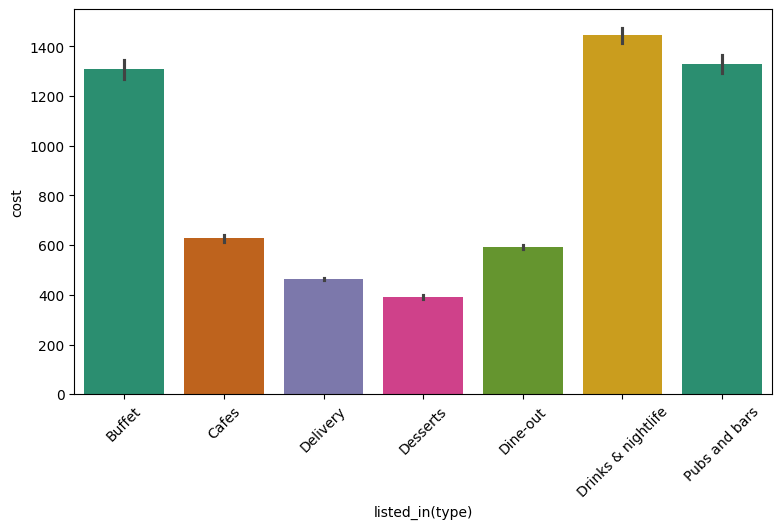

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='listed_in(type)', y='cost', palette=sns.palettes.mpl_palette('Dark2'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Night life costs the most

##Listed-in Type & City

<ipython-input-494-a080dec1ef79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='listed_in(type)', y='listed_in(city)', palette='Dark2')


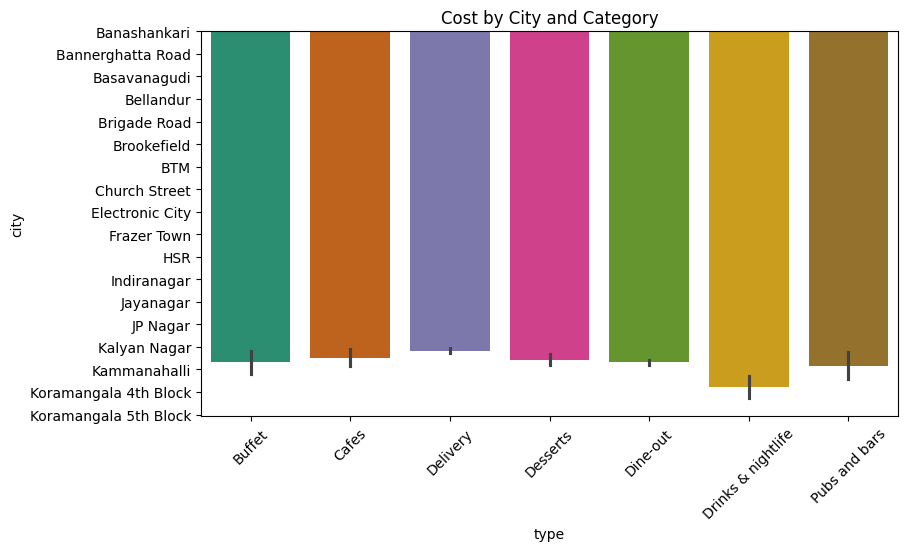

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='listed_in(type)', y='listed_in(city)', palette='Dark2')

# Customize the plot
plt.title('Cost by City and Category')
plt.xlabel('type')
plt.ylabel('city')
plt.xticks(rotation=45)
plt.show()

##rate & cost

<ipython-input-495-77e38894546b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='cost', y='rate', palette='Dark2')


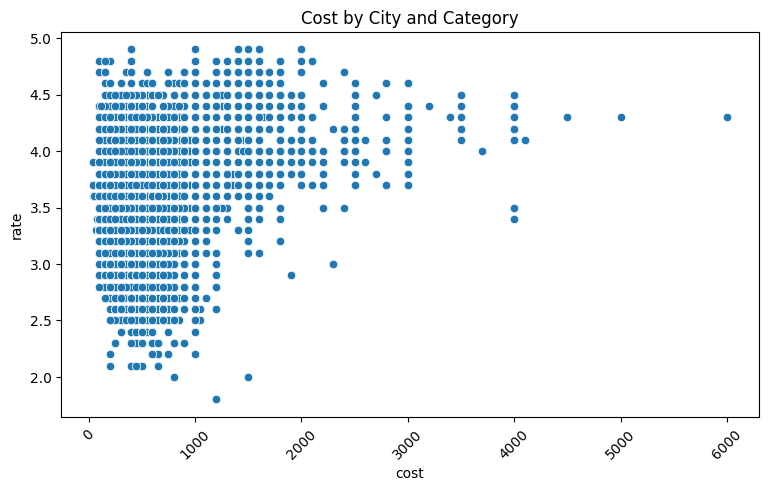

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='cost', y='rate', palette='Dark2')

# Customize the plot
plt.title('Cost by City and Category')
plt.xlabel('cost')
plt.ylabel('rate')
plt.xticks(rotation=45)
plt.show()

##rates & votes

<ipython-input-496-341391bb30ff>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='votes', y='rate', palette='Dark2')


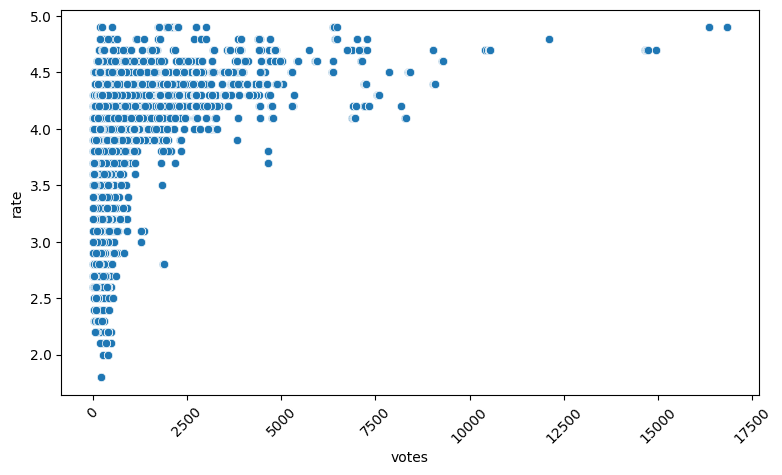

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='votes', y='rate', palette='Dark2')

# Customize the plot
plt.xlabel('votes')
plt.ylabel('rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter the DataFrame
df[(df['votes'] == 0) & (df['rate'] == 0)].shape[0]

0

In [ ]:
# Filter the DataFrame
df[(df['votes'] == 0) & (df['rate'].isna())].shape[0]

10008

In [ ]:
#needs special treatment as they are restaurants that hasn't been rated yet

##online_order & cost

<ipython-input-500-f064f98ad700>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='online_order', y='cost', palette='Dark2')


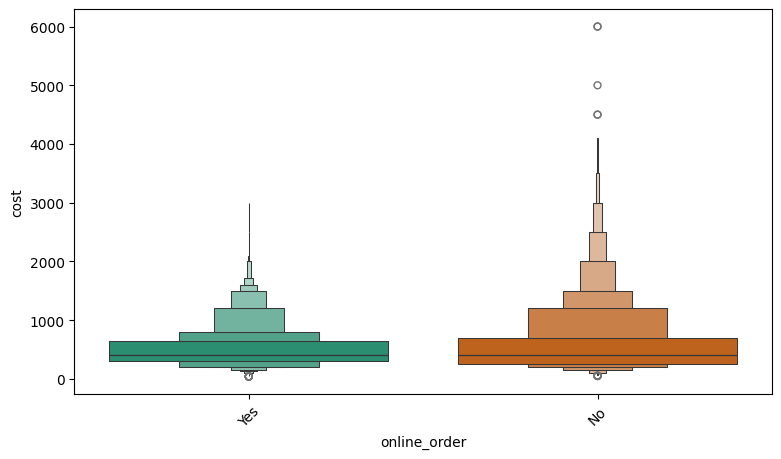

In [ ]:
plt.figure(figsize=(9,5))
sns.boxenplot(data=df, x='online_order', y='cost', palette='Dark2')

# Customize the plot
plt.xlabel('online_order')
plt.ylabel('cost')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#High-end restaurants don't offer online ordering and have a higher cost

##book_table & rate

<ipython-input-502-58470bd9b30f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='book_table', y='cost', palette='Dark2')


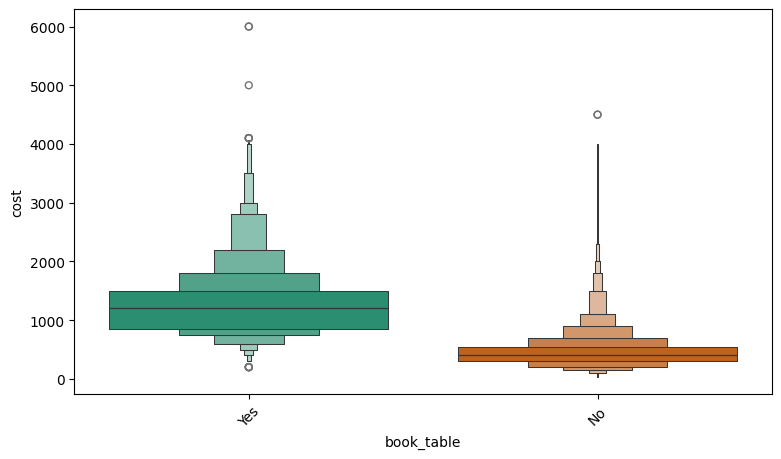

In [ ]:
plt.figure(figsize=(9,5))
sns.boxenplot(data=df, x='book_table', y='cost', palette='Dark2')

# Customize the plot
plt.xlabel('book_table')
plt.ylabel('cost')
plt.xticks(rotation=45)
plt.show()

##Rate & hues

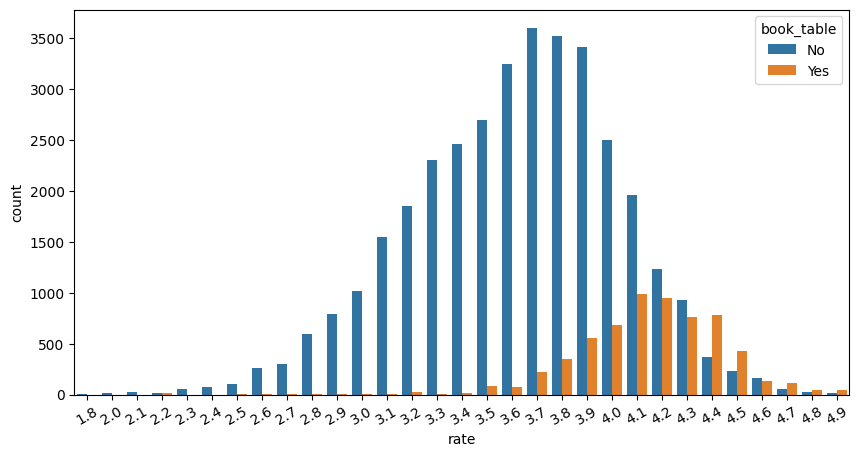

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rate', hue='book_table')
plt.xticks(rotation=30)
plt.show()

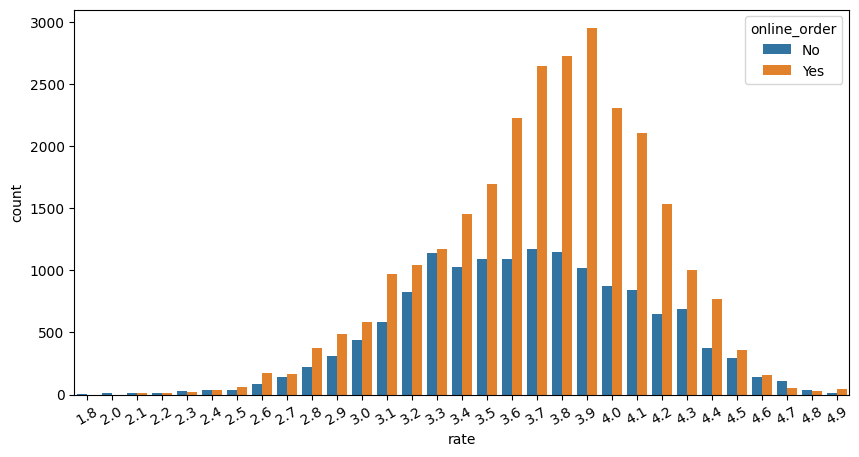

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rate', hue='online_order')
plt.xticks(rotation=30)
plt.show()

#MVA

<Axes: >

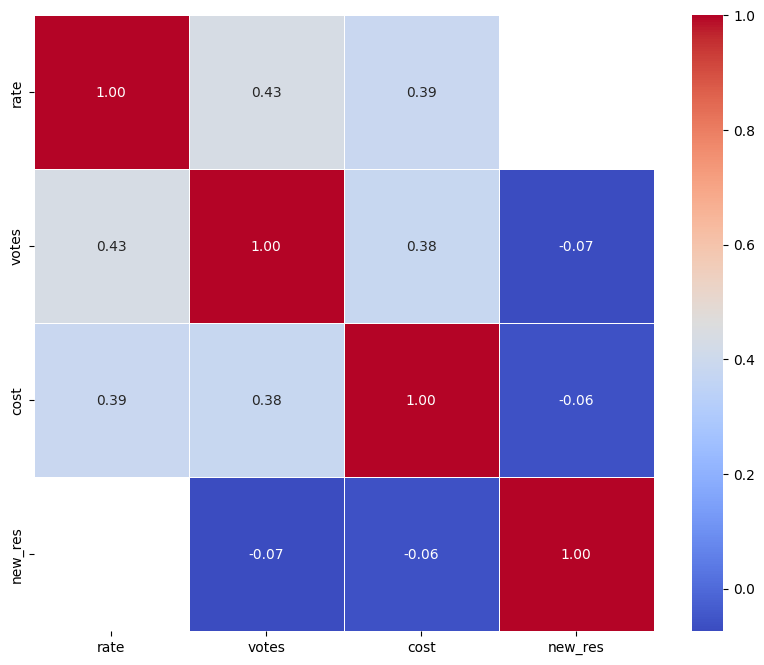

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

#Feature Engineering

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city),new_res
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,casual dining,"Dum Biryani, Lunch Buffet, Masala Papad, Panee...","chinese, mughlai, north indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,casual dining,"Chicken Biryani, Chocolate Nirvana, Dum Biryan...","chinese, north indian, thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"cafe, casual dining","Cannelloni, Churros, Hot Chocolate, Minestrone...","cafe, italian, mexican",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,quick bites,Masala Dosa,"north indian, south indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,casual dining,"Gol Gappe, Panipuri","north indian, rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,0


In [ ]:
#extract the ratings from the reviews list

In [ ]:
def extract_ratings(votes):
    all_ratings = []
    if votes:
      for item in votes:  # 'votes' is the list
          # Check if the first element is a string before processing
          if isinstance(item[0], str):
              # Remove non-numeric characters and try converting to float
              num_rating_str = ''.join([char if char.isdigit() or char == '.' else '' for char in item[0]])
              # Check if the resulting string is not empty or just a decimal point
              if num_rating_str:
                  try:
                      num_rating = float(num_rating_str)
                      all_ratings.append(num_rating)
                  except ValueError:
                      pass  # Skip if it's not a valid float
      return all_ratings
    else:
        return np.nan  # Return NaN if no valid ratings were found

In [ ]:
#applying the mean function to the reviews list and storing the result to a new column
df['all_ratings'] = df['reviews_list'].apply(extract_ratings)
df['all_ratings'] = df['all_ratings'].round(1)

In [ ]:
df['tot_num_rates'] = df['all_ratings'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [ ]:
filtered_df = df[(df['votes'] == 0) & (df['tot_num_rates'] == 0)]  # Filter rows where votes are 0
rate_counts = filtered_df['rate'].value_counts()

print(rate_counts)


Series([], Name: count, dtype: int64)


In [ ]:
filtered_df = df[(df['votes'] == 0) & (df['tot_num_rates'] != 0)]  # Filter rows where votes are 0
rate_counts = filtered_df['rate'].value_counts()  # Count how many times each rate appears

print(rate_counts)


rate
3.7    5
3.6    3
3.9    2
3.8    2
3.4    2
3.3    2
4.0    1
4.3    1
4.1    1
Name: count, dtype: int64


In [ ]:
filtered_df = df[df['votes'] == df['tot_num_rates']]  # Filter rows where votes are 0
rate_counts = filtered_df['rate'].value_counts()  # Count how many times each rate appears

print(rate_counts)

rate
3.3    137
3.4     98
3.2     96
3.5     87
3.6     54
2.9     33
3.1     27
3.8     21
3.7     20
4.0     12
3.0     12
3.9      3
4.1      1
Name: count, dtype: int64


In [ ]:
#now after examining the votes and votes extracted from review lists more, many values are different between them.
#this maybe becaue of an error during data entry, late updates, etc...
#bottom line is, i won't use these new reviews in the model

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city),new_res,all_ratings,tot_num_rates
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,casual dining,"Dum Biryani, Lunch Buffet, Masala Papad, Panee...","chinese, mughlai, north indian",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0,"[4.0, 0.0, 4.0, 0.0, 2.0, 0.0, 4.0, 0.0, 5.0, ...",85
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,casual dining,"Chicken Biryani, Chocolate Nirvana, Dum Biryan...","chinese, north indian, thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,0,"[4.0, 0.0, 3.0, 0.0, 3.0, 0.0, 4.0, 0.0, 4.0, ...",71
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"cafe, casual dining","Cannelloni, Churros, Hot Chocolate, Minestrone...","cafe, italian, mexican",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,0,"[3.0, 0.0, 3.0, 0.0, 4.0, 0.0, 1.0, 5.0, 1.0, ...",103
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,quick bites,Masala Dosa,"north indian, south indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0,"[4.0, 0.0, 5.0, 2.0, 0.0, 3.0, 4.0, 0.0, 2.0, ...",169
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,casual dining,"Gol Gappe, Panipuri","north indian, rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,0,"[4.0, 0.0, 4.0, 0.0, 4.0, 5.0, 3.0, 5.0, 5.0, ...",13


In [ ]:
#For predicting future ratings, I think 'url', 'address', 'phone' aren't crucial
#dropping all of them 'reviews_list', 'menu_item'
#as well as the columns I extracted important data from:

In [ ]:
df.drop(['url', 'address', 'phone', 'reviews_list', 'menu_item'], axis=1, inplace=True)

In [ ]:
#important data was extracted from 'reviews_list' so drop it as well
#I don't know how to use 'menu_item', 'matching_dishes' so also drop them
#df.drop(['reviews_list', 'menu_item', 'matching_dishes', 'dish_liked'], axis=1, inplace=True)

In [ ]:
#drop 'all_ratings' & 'tot_num_rates' to avoid confusion
df.drop(['all_ratings','tot_num_rates'], axis=1, inplace=True)

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,listed_in(type),listed_in(city),new_res
0,Jalsa,Yes,Yes,4.1,775,Banashankari,casual dining,"Dum Biryani, Lunch Buffet, Masala Papad, Panee...","chinese, mughlai, north indian",800.0,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,casual dining,"Chicken Biryani, Chocolate Nirvana, Dum Biryan...","chinese, north indian, thai",800.0,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"cafe, casual dining","Cannelloni, Churros, Hot Chocolate, Minestrone...","cafe, italian, mexican",800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,quick bites,Masala Dosa,"north indian, south indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,casual dining,"Gol Gappe, Panipuri","north indian, rajasthani",600.0,Buffet,Banashankari,0


#Duplicates

In [ ]:
df.duplicated().sum()

108

In [ ]:
df.drop_duplicates(inplace=True,keep='first')

#Preprocessing

##Nulls Treatment

In [ ]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,10019
votes,0
location,21
rest_type,227
dish_liked,28014
cuisines,45
cost,344


In [ ]:
100*(df.isnull().sum()/len(df))

,0
name,0.000000
online_order,0.000000
book_table,0.000000
rate,19.413281
votes,0.000000
location,0.040691
rest_type,0.439846
dish_liked,54.281230
cuisines,0.087194
cost,0.666550


In [ ]:
df[df.isnull().all(axis=1)]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,listed_in(type),listed_in(city),new_res


In [ ]:
#cost
df['cost'] = df['cost'].fillna(df.groupby(['listed_in(city)', 'listed_in(type)'])['cost'].transform('median'))
print(df['cost'].isna().sum())  # Check for remaining NaN values

0


In [ ]:
#cuisines
# Fill NaN values in 'cuisines' with the mode of 'cuisines' for each 'location'
df['cuisines'] = df.groupby(['location','listed_in(type)'])['cuisines'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
#rest_type
df['rest_type'] = df.groupby(['listed_in(city)', 'cost'])['rest_type'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
#drop dish_liked dui to high % of nulls
df.drop('dish_liked',axis=1,inplace=True)

In [ ]:
df = df.dropna(subset=['cuisines'])

In [ ]:
df.shape

(51588, 12)

In [ ]:
df.shape

(51588, 12)

In [ ]:
df[(df['rate'].isna())&(df['new_res']==1)].shape[0]

2195

In [ ]:
df2 = df.copy()

In [ ]:
#drop nulls in the target when new_rest is false only
df = df.loc[~(df['rate'].isna() & (df['new_res'] == 0))]

In [ ]:
df_new = df[df['rate'].isna()] #added the new restaurants to a separate df for now

In [ ]:
#drop the NEW rest.
df = df.dropna(subset=['rate'])

In [ ]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
cost,0
listed_in(type),0


##Skewness

##Outliers Treatment

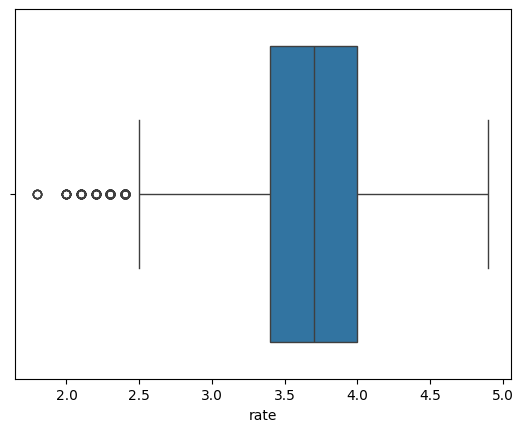

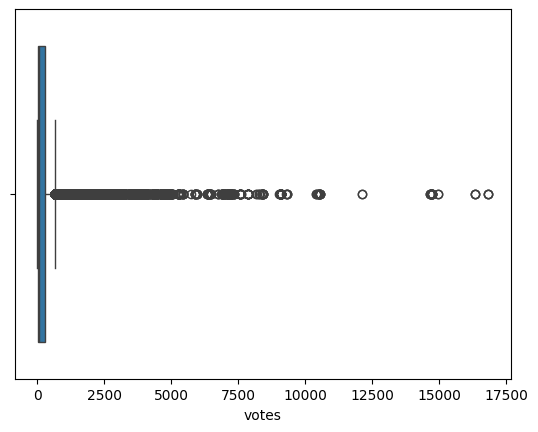

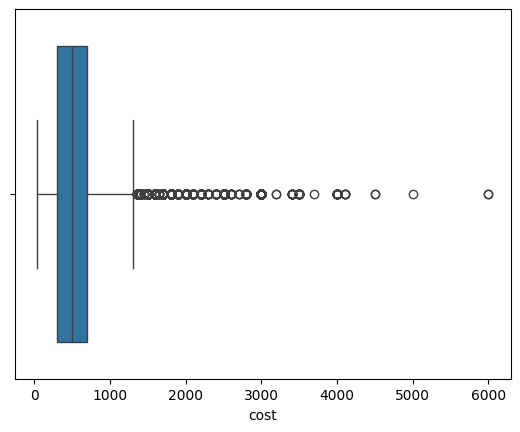

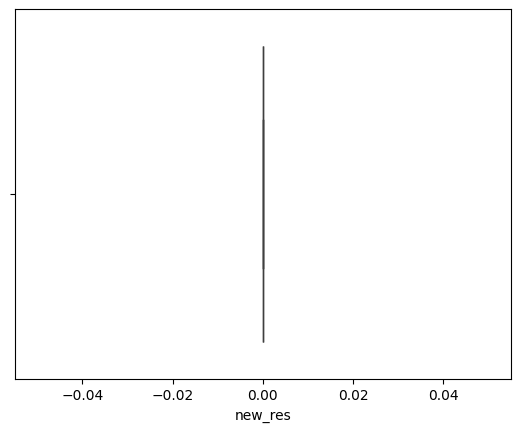

In [ ]:
#Box plots for all numerical values
for i in df.iloc[:,:].columns:
  if df[i].dtype in ['int64', 'float64']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [ ]:
#log transformations for the skewed data
df['log_votes'] = np.log1p(df['votes'])
df['log_cost'] = np.log1p(df['cost'])

In [ ]:
#remove 'name', 'new_res'
df.drop(['name','new_res'],axis=1,inplace=True)

In [ ]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type),listed_in(city),log_votes,log_cost
0,Yes,Yes,4.1,775,Banashankari,casual dining,"chinese, mughlai, north indian",800.0,Buffet,Banashankari,6.654153,6.685861
1,Yes,No,4.1,787,Banashankari,casual dining,"chinese, north indian, thai",800.0,Buffet,Banashankari,6.669498,6.685861
2,Yes,No,3.8,918,Banashankari,"cafe, casual dining","cafe, italian, mexican",800.0,Buffet,Banashankari,6.823286,6.685861
3,No,No,3.7,88,Banashankari,quick bites,"north indian, south indian",300.0,Buffet,Banashankari,4.488636,5.707110
4,No,No,3.8,166,Basavanagudi,casual dining,"north indian, rajasthani",600.0,Buffet,Banashankari,5.117994,6.398595


In [ ]:
df_corr = df.select_dtypes(include=['number'])
df_corr.corr()["rate"].sort_values()


,rate
log_cost,0.366006
cost,0.383919
votes,0.433540
log_votes,0.637070
rate,1.000000


##Duplicates

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True, keep='first')

#Encoding

##One Hot Encoding

In [ ]:
df.describe(include='O')

,online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,41584,41584,41584,41584,41584,41584,41584
unique,2,2,92,66,1699,7,30
top,Yes,No,BTM,quick bites,"chinese, north indian",Delivery,BTM
freq,27146,35309,3921,14016,2320,20599,2601


In [ ]:
df.shape

(41584, 12)

In [ ]:
 #encode sex, embarked
encoder = OneHotEncoder(sparse_output=False, drop='first')
enc_data = encoder.fit_transform(df[['online_order', 'book_table']])
enc_df = pd.DataFrame(enc_data, columns=encoder.get_feature_names_out(['online_order', 'book_table']))

print(enc_df)

       online_order_Yes  book_table_Yes
0                   1.0             1.0
1                   1.0             0.0
2                   1.0             0.0
3                   0.0             0.0
4                   0.0             0.0
...                 ...             ...
41579               0.0             0.0
41580               0.0             0.0
41581               0.0             0.0
41582               0.0             1.0
41583               0.0             0.0

[41584 rows x 2 columns]


In [ ]:
# Reset the index to ensure alignment as the resulted output kept adding more rows to rach over 50,000 again!
df.reset_index(drop=True, inplace=True)
enc_df.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
df = pd.concat([df, enc_df], axis=1)

# Print the output shape
print("Output shape:", df.shape)


Output shape: (41584, 14)


In [ ]:
df.drop(['online_order','book_table'],axis=1,inplace=True)

In [ ]:
df.describe(include='O')

,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,41584,41584,41584,41584,41584
unique,92,66,1699,7,30
top,BTM,quick bites,"chinese, north indian",Delivery,BTM
freq,3921,14016,2320,20599,2601


In [ ]:
#after researching to find a suitable encoding method, Frequency encoding will be used.

##Frequency Encoding

In [ ]:
enc_features = ['location', 'rest_type', 'cuisines', 'listed_in(city)', 'listed_in(type)']
for category in enc_features:
    freq_encoding = df[category].value_counts().to_dict()
    df['enc_'+category] = df[category].map(freq_encoding)

In [ ]:
df.head()

,rate,votes,location,rest_type,cuisines,cost,listed_in(type),listed_in(city),log_votes,log_cost,online_order_Yes,book_table_Yes,enc_location,enc_rest_type,enc_cuisines,enc_listed_in(city),enc_listed_in(type)
0,4.1,775,Banashankari,casual dining,"chinese, mughlai, north indian",800.0,Buffet,Banashankari,6.654153,6.685861,1.0,1.0,744,9686,227,728,853
1,4.1,787,Banashankari,casual dining,"chinese, north indian, thai",800.0,Buffet,Banashankari,6.669498,6.685861,1.0,0.0,744,9686,14,728,853
2,3.8,918,Banashankari,"cafe, casual dining","cafe, italian, mexican",800.0,Buffet,Banashankari,6.823286,6.685861,1.0,0.0,744,491,11,728,853
3,3.7,88,Banashankari,quick bites,"north indian, south indian",300.0,Buffet,Banashankari,4.488636,5.707110,0.0,0.0,744,14016,443,728,853
4,3.8,166,Basavanagudi,casual dining,"north indian, rajasthani",600.0,Buffet,Banashankari,5.117994,6.398595,0.0,0.0,595,9686,47,728,853


In [ ]:
df.drop(['location', 'rest_type', 'cuisines', 'listed_in(city)', 'listed_in(type)'],axis=1,inplace=True)

In [ ]:
df['combined_target'] = (df['rate'] * df['log_votes']) / (df['log_votes'] + 10) + (df['rate'].mean() * 10) / (df['log_votes'] + 10)

In [ ]:
df.drop(['rate', 'votes', 'cost', 'log_votes'],axis=1,inplace=True)

<Axes: >

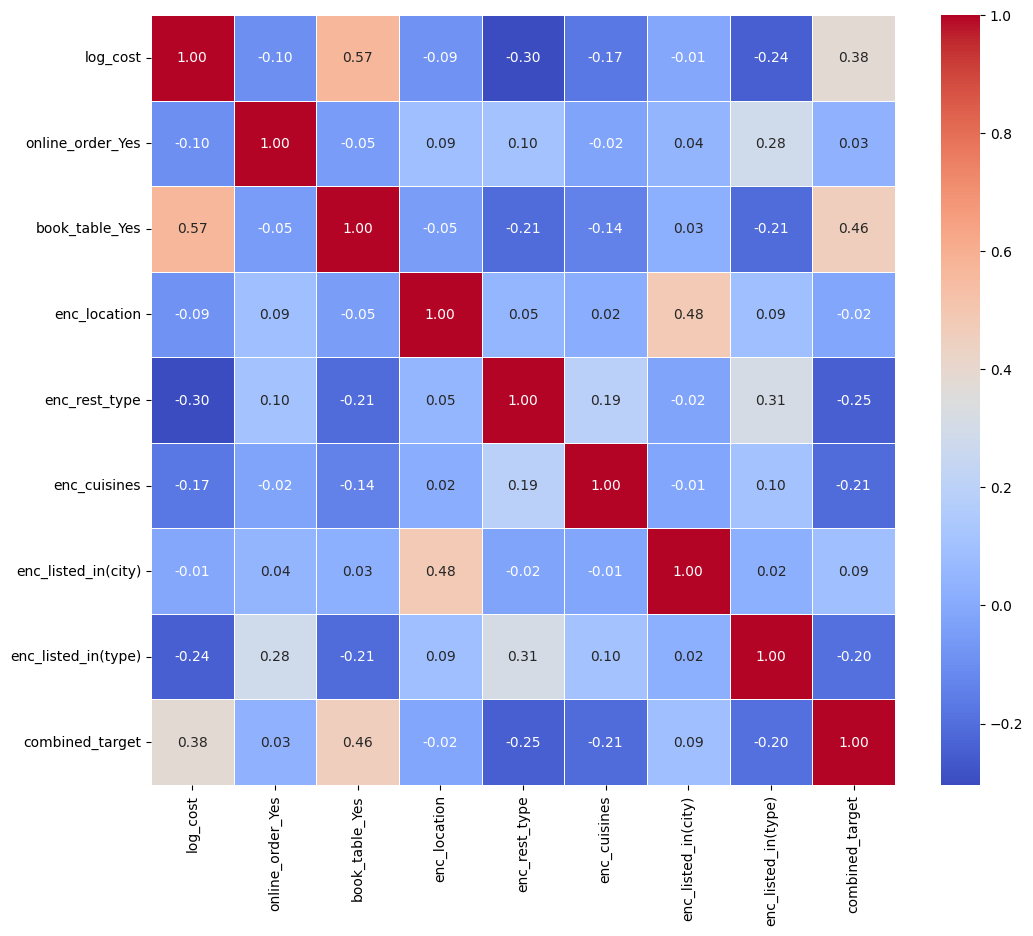

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [ ]:
df.columns

Index(['log_cost', 'online_order_Yes', 'book_table_Yes', 'enc_location',
       'enc_rest_type', 'enc_cuisines', 'enc_listed_in(city)',
       'enc_listed_in(type)', 'combined_target'],
      dtype='object')

#Splitting

In [ ]:
x = df.drop('combined_target', axis=1)
y = df['combined_target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

#Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Linear Regression Model

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_train)

In [ ]:
print(f"Model coefficients (weights): {reg.coef_}")
print(f"Model intercept (bias): {reg.intercept_}")

Model coefficients (weights): [ 0.01850152  0.01258798  0.04846779 -0.0041604  -0.01472705 -0.01608905
  0.01337283 -0.01083643]
Model intercept (bias): 3.7232087507855876


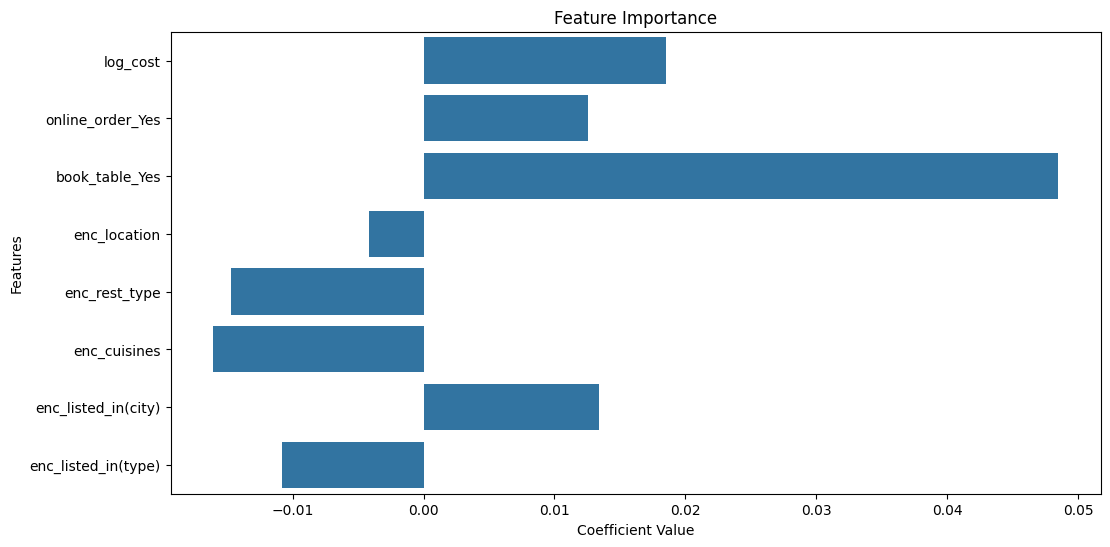

In [ ]:
coefficients = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficient'])
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [ ]:
#Train data performance
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

r2 = r2_score(y_train, y_pred, force_finite=False)
print(f"R2 Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0150
R2 Score (R2): 0.2795


In [ ]:
y_pred_test = reg.predict(x_test)

#Test data performance
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse:.4f}")

r2 = r2_score(y_test, y_pred_test, force_finite=False)
print(f"R2 Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0151
R2 Score (R2): 0.2632


#Polynomial Regression Model

In [ ]:
degrees = [2,3,4,5]
mse = []
r2 = []
mse_test = []
r2_test = []

In [ ]:
for degree in degrees:
  poly_model = PolynomialFeatures(degree=degree)
  x_poly = poly_model.fit_transform(x_train)
  x_test_poly= poly_model.transform(x_test)
  reg_model = LinearRegression()
  reg_model.fit(x_poly, y_train)

  #train
  y_pred = reg_model.predict(x_poly)
  mse.append(mean_squared_error(y_train, y_pred))
  r2.append(r2_score(y_train,y_pred, force_finite=False))

  #test
  y_pred_test = reg_model.predict(x_test_poly)
  mse_test.append(mean_squared_error(y_test, y_pred_test))
  r2_test.append(r2_score(y_test,y_pred_test, force_finite=False))

  print(f'loop {degree} done')

loop 2 done
loop 3 done
loop 4 done
loop 5 done


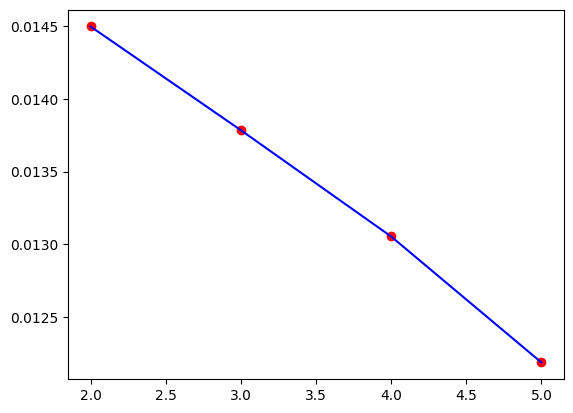

In [ ]:
plt.scatter(degrees, mse, color='red')
plt.plot(degrees, mse, color='blue')

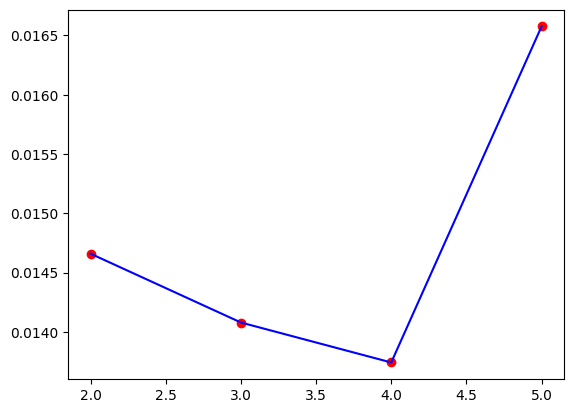

In [ ]:
plt.scatter(degrees, mse_test, color='red')
plt.plot(degrees, mse_test, color='blue')

In [ ]:
poly_model = PolynomialFeatures(degree=4)
x_poly = poly_model.fit_transform(x_train)
reg_model = LinearRegression()
reg_model.fit(x_poly, y_train)

LinearRegression()

In [ ]:
#train
y_pred = reg_model.predict(x_poly)

mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

r2 = r2_score(y_train, y_pred, force_finite=False)
print(f"R2 Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0131
R2 Score (R2): 0.3737


In [ ]:
#test
x_test_poly= poly_model.transform(x_test)
y_pred_test = reg_model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse:.4f}")

r2 = r2_score(y_test, y_pred_test, force_finite=False)
print(f"R2 Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0137
R2 Score (R2): 0.3280
